# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [1]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_exc import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Read MNIST data:
You can download the data from [here](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


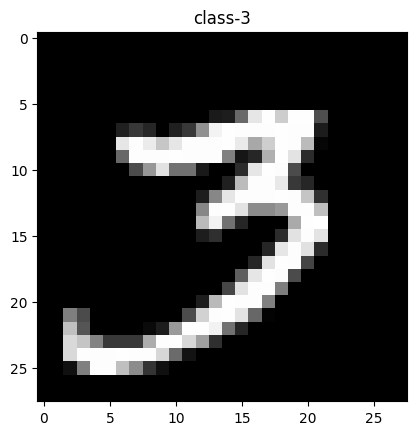

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = r"data"

train_image_filename = os.path.join(dataset_path, 'train-images-idx3-ubyte.gz')
train_label_filename = os.path.join(dataset_path, 'train-labels-idx1-ubyte.gz')

test_image_filename = os.path.join(dataset_path, 't10k-images-idx3-ubyte.gz')
test_label_filename = os.path.join(dataset_path, 't10k-labels-idx1-ubyte.gz')

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# CROSS-CHECK: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [3]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [4]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
net = FirstNN(data_dimension, num_hidden_nodes, num_classes)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.227203: 100%|██████████| 300/300 [00:01<00:00, 157.18it/s]


epoch: 1 / (30), loss: 1.758108, train acc: 83.35, val acc: 82.63
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.782464: 100%|██████████| 300/300 [00:01<00:00, 197.60it/s]


epoch: 2 / (30), loss: 0.963451, train acc: 89.11, val acc: 88.75
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.648228: 100%|██████████| 300/300 [00:01<00:00, 207.94it/s]


epoch: 3 / (30), loss: 0.654977, train acc: 90.31, val acc: 90.07
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.445526: 100%|██████████| 300/300 [00:01<00:00, 207.38it/s]


epoch: 4 / (30), loss: 0.518801, train acc: 90.94, val acc: 90.52
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.473437: 100%|██████████| 300/300 [00:01<00:00, 207.57it/s]


epoch: 5 / (30), loss: 0.444504, train acc: 91.47, val acc: 91.08
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.321283: 100%|██████████| 300/300 [00:01<00:00, 206.12it/s]


epoch: 6 / (30), loss: 0.397611, train acc: 92.10, val acc: 91.78
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.271985: 100%|██████████| 300/300 [00:01<00:00, 207.33it/s]


epoch: 7 / (30), loss: 0.364730, train acc: 92.23, val acc: 92.02
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.280409: 100%|██████████| 300/300 [00:01<00:00, 202.23it/s]


epoch: 8 / (30), loss: 0.342612, train acc: 92.37, val acc: 92.35
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.406791: 100%|██████████| 300/300 [00:01<00:00, 195.04it/s]


epoch: 9 / (30), loss: 0.322877, train acc: 92.85, val acc: 92.57
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.342275: 100%|██████████| 300/300 [00:01<00:00, 198.79it/s]


epoch: 10 / (30), loss: 0.307165, train acc: 93.03, val acc: 92.92
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.234233: 100%|██████████| 300/300 [00:01<00:00, 213.56it/s]


epoch: 11 / (30), loss: 0.292922, train acc: 93.13, val acc: 92.87
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.281473: 100%|██████████| 300/300 [00:01<00:00, 213.16it/s]


epoch: 12 / (30), loss: 0.281901, train acc: 93.49, val acc: 92.98
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.263325: 100%|██████████| 300/300 [00:01<00:00, 210.11it/s]


epoch: 13 / (30), loss: 0.274330, train acc: 93.56, val acc: 93.35
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.239021: 100%|██████████| 300/300 [00:01<00:00, 213.26it/s]


epoch: 14 / (30), loss: 0.263180, train acc: 93.69, val acc: 93.68
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.339029: 100%|██████████| 300/300 [00:01<00:00, 207.27it/s]


epoch: 15 / (30), loss: 0.256566, train acc: 93.81, val acc: 93.85
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.291084: 100%|██████████| 300/300 [00:01<00:00, 207.89it/s]


epoch: 16 / (30), loss: 0.250525, train acc: 93.94, val acc: 93.88
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.276121: 100%|██████████| 300/300 [00:01<00:00, 216.68it/s]


epoch: 17 / (30), loss: 0.243072, train acc: 93.94, val acc: 93.78
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.230794: 100%|██████████| 300/300 [00:01<00:00, 212.04it/s]


epoch: 18 / (30), loss: 0.238615, train acc: 93.92, val acc: 93.95
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.220241: 100%|██████████| 300/300 [00:01<00:00, 214.07it/s]


epoch: 19 / (30), loss: 0.233266, train acc: 94.17, val acc: 93.90
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.218983: 100%|██████████| 300/300 [00:01<00:00, 216.76it/s]


epoch: 20 / (30), loss: 0.229372, train acc: 94.37, val acc: 94.48
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.210095: 100%|██████████| 300/300 [00:01<00:00, 215.61it/s]


epoch: 21 / (30), loss: 0.223706, train acc: 94.32, val acc: 94.05
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.328155: 100%|██████████| 300/300 [00:01<00:00, 211.43it/s]


epoch: 22 / (30), loss: 0.219774, train acc: 94.52, val acc: 94.42
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.211495: 100%|██████████| 300/300 [00:01<00:00, 210.12it/s]


epoch: 23 / (30), loss: 0.216219, train acc: 94.63, val acc: 94.32
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.193965: 100%|██████████| 300/300 [00:01<00:00, 215.69it/s]


epoch: 24 / (30), loss: 0.210806, train acc: 94.88, val acc: 94.68
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.230996: 100%|██████████| 300/300 [00:01<00:00, 211.43it/s]


epoch: 25 / (30), loss: 0.209302, train acc: 94.79, val acc: 94.77
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.192211: 100%|██████████| 300/300 [00:01<00:00, 213.16it/s]


epoch: 26 / (30), loss: 0.205384, train acc: 94.70, val acc: 94.70
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.161870: 100%|██████████| 300/300 [00:01<00:00, 205.67it/s]


epoch: 27 / (30), loss: 0.202842, train acc: 94.98, val acc: 94.82
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.211408: 100%|██████████| 300/300 [00:01<00:00, 202.03it/s]


epoch: 28 / (30), loss: 0.195967, train acc: 94.99, val acc: 94.82
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.184717: 100%|██████████| 300/300 [00:01<00:00, 212.59it/s]


epoch: 29 / (30), loss: 0.194979, train acc: 95.22, val acc: 95.03
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.156855: 100%|██████████| 300/300 [00:01<00:00, 208.64it/s]


epoch: 30 / (30), loss: 0.191530, train acc: 95.21, val acc: 95.13


In [5]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 95.21
Validation accuracy: 95.13
Test accuracy: 94.25


# Plot the loss.

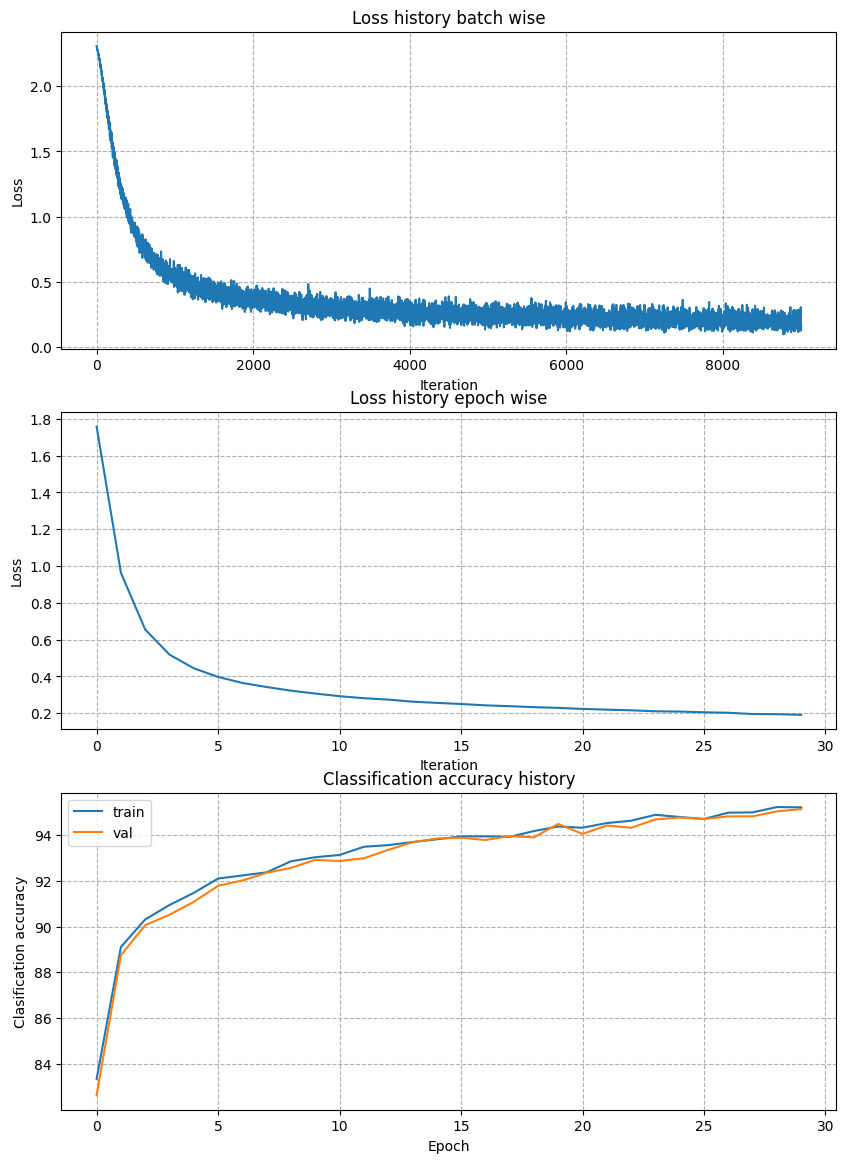

In [6]:
# Plot the loss function and train / validation accuracies
plt.figure(figsize=(10, 14))    
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [7]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256

for lr in learning_rates:
    for hnn in num_hidden_nodes:
        if hnn not in results:
            results[hnn]={}
        net=FirstNN(data_dimension,hnn,num_classes)
        out=net.train(X_train,Y_train,X_val,Y_val,num_iters=num_iters,num_epoch=num_epoch,batch_size=batch_size,learning_rate=lr,verbose=False)
        Y_val_pred=net.predict(X_val,best_param=True)
        val_acc=100*(Y_val_pred==Y_val).mean()
        results[hnn,lr]=
        val_acc
        if val_acc > best_val:
            best_val=val_acc
            best_net=net
            best_net.best_params=net.params
            best_net.learning_rate=lr
            


# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

c:\Users\DEBARSHI\Documents\Programs\Python\Deep Learning and Natural Language Processing, DA345\first_nn_exc.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


Best validation accuracy achieved during cross-validation: 96.88 for #hdnn: 100, lr: 0.01


# Test on best model

In [8]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.90
Validation accuracy: 96.88
Test accuracy: 95.25
